In [4]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings                
warnings.filterwarnings('ignore')


ModuleNotFoundError: No module named 'pandas'

In [54]:
df = pd.read_excel('final_data.xlsx')

In [55]:
df.shape

(25386, 54)

In [56]:
target = 'FRISKED_FLAG'

In [57]:
df[target].value_counts(normalize=True)

FRISKED_FLAG
Y    0.618097
N    0.381903
Name: proportion, dtype: float64

In [58]:
df.head()

,STOP_FRISK_TIME,DAY2,STOP_WAS_INITIATED,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,SUPERVISING_OFFICER_COMMAND_CODE,SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED,LOCATION_IN_OUT_CODE,JURISDICTION_CODE,JURISDICTION_DESCRIPTION,...,SUSPECT_HAIR_COLOR,SUSPECT_OTHER_DESCRIPTION,STOP_LOCATION_PRECINCT,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,118,1,2,46,10,46,1,1,1,1,...,1,6896,28,262,2426,860,3262,11086,2,0
1,48,1,2,120,10,67,1,1,3,3,...,1,1054,39,262,6076,1361,874,1413,1,1
2,70,1,1,871,10,871,1,2,2,2,...,1,5725,40,262,0,2773,8944,1294,1,1
3,70,1,1,871,10,871,1,2,2,2,...,1,5487,40,262,0,2773,8944,1294,1,1
4,70,1,1,871,10,871,1,2,2,2,...,1,1144,40,262,0,2773,8944,1294,1,1


In [6]:
x = df.drop(columns=[target])
y = df[target]

lab_enc = preprocessing.LabelEncoder(); y_encoded = lab_enc.fit_transform(y) # this removes an encoding error 

random_forest_feat = RandomForestClassifier(random_state = 50)   # instantiate the random forest  
random_forest_feat = random_forest_feat.fit(x,np.ravel(y_encoded)) # fit the random forest
importances = random_forest_feat.feature_importances_ # extract the expected feature importances
# std = np.std([tree.feature_importances_ for tree in random_forest_feat.estimators_],axis=0) # calculate stdev over trees
feat_ranks = np.argsort(importances)[::-1]   # find feature ranks in descending order

In [7]:
imp_df = pd.DataFrame()
imp_df['Features'] = x.columns[feat_ranks]
imp_df['score'] = importances[feat_ranks]
imp_df

,Features,score
0,BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG,0.161729
1,SUSPECTED_CRIME_DESCRIPTION,0.101618
2,SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG,0.096365
3,STOP_LOCATION_X,0.041684
4,STOP_WAS_INITIATED,0.039998
5,STOP_LOCATION_Y,0.034040
6,STOP_DURATION_MINUTES,0.031027
7,STOP_LOCATION_FULL_ADDRESS,0.027189
8,STOP_FRISK_TIME,0.026967
9,SUSPECT_REPORTED_AGE,0.025570


In [8]:
imp_feats = imp_df['Features'].head(17).tolist()

In [10]:
df[imp_feats].head()

,BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG,SUSPECTED_CRIME_DESCRIPTION,SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG,STOP_LOCATION_X,STOP_WAS_INITIATED,STOP_LOCATION_Y,STOP_DURATION_MINUTES,STOP_LOCATION_FULL_ADDRESS,STOP_FRISK_TIME,SUSPECT_REPORTED_AGE,STOP_LOCATION_STREET_NAME,STOP_LOCATION_PRECINCT,SUSPECTS_ACTIONS_DECRIPTION_FLAG,SEARCH_BASIS_HARD_OBJECT_FLAG,SUPERVISING_OFFICER_COMMAND_CODE,ISSUING_OFFICER_COMMAND_CODE,SUSPECT_WEIGHT
0,1,5,0,3262,2,11086,1,2426,118,27.0,860,28,1,0,46,46,160.0
1,1,5,0,874,2,1413,3,6076,48,22.0,1361,39,1,0,67,120,200.0
2,1,14,1,8944,1,1294,20,0,70,17.0,2773,40,0,1,871,871,140.0
3,1,14,1,8944,1,1294,20,0,70,13.0,2773,40,0,1,871,871,120.0
4,1,14,1,8944,1,1294,20,0,70,14.0,2773,40,0,1,871,871,120.0


In [11]:
df[imp_feats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25386 entries, 0 to 25385
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG         25386 non-null  int64  
 1   SUSPECTED_CRIME_DESCRIPTION                        25386 non-null  int64  
 2   SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG  25386 non-null  int64  
 3   STOP_LOCATION_X                                    25386 non-null  int64  
 4   STOP_WAS_INITIATED                                 25386 non-null  int64  
 5   STOP_LOCATION_Y                                    25386 non-null  int64  
 6   STOP_DURATION_MINUTES                              25386 non-null  int64  
 7   STOP_LOCATION_FULL_ADDRESS                         25386 non-null  int64  
 8   STOP_FRISK_TIME                                    25386 non-null  int64  
 9   SUSPEC

### Apply ML algorithms and compare their results

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=23)

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.feature_selection import RFE
from sklearn import metrics

In [70]:
def confunsion_matrix(y_test,y_pred):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

def get_model_performance(y_test,y_pred):
    # print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    # print("Precision:",metrics.precision_score(y_test, y_pred,average="binary", pos_label="Y"))
    # print("Recall:",metrics.recall_score(y_test, y_pred,average="binary", pos_label="Y"))
    # print("F1:",metrics.f1_score(y_test, y_pred,average="binary", pos_label="Y"))

    acc_score = metrics.accuracy_score(y_test,y_pred)
    precision = metrics.precision_score(y_test, y_pred,average="binary", pos_label="Y")
    recall = metrics.recall_score(y_test, y_pred,average="binary", pos_label="Y")
    f1 = metrics.f1_score(y_test, y_pred,average="binary", pos_label="Y")

    return acc_score,precision,recall,f1
def acu_plot(clf,X_test,y_test):
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label="Y")
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=4)
    plt.show()

def model_performance(clf,X_test,y_test,y_pred):
    confunsion_matrix(y_test,y_pred)
    acu_plot(clf,X_test,y_test)
    acc,precision,recall,f1=get_model_performance(y_test, y_pred)
    return acc,precision,recall,f1

##### 1. Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

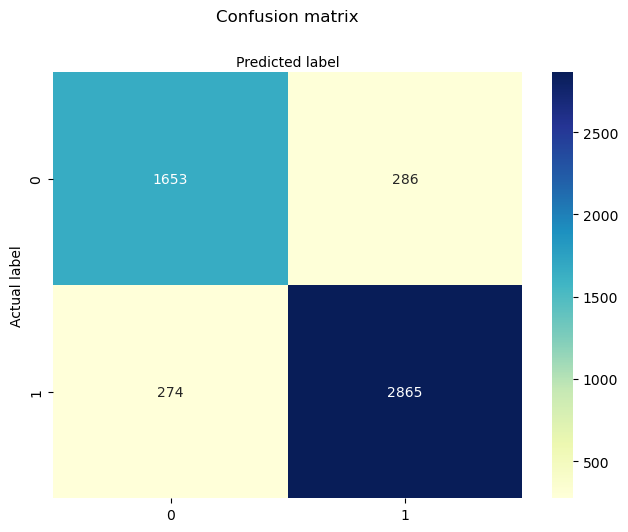

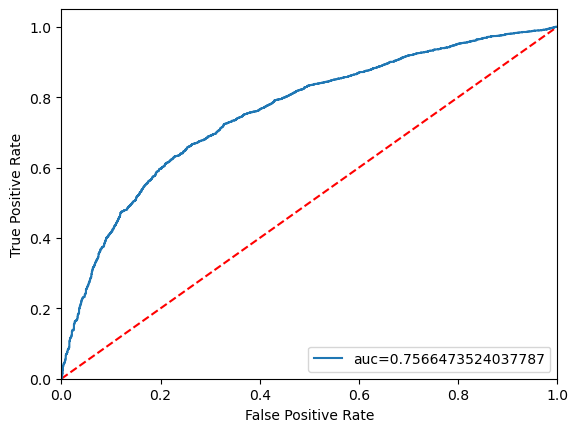

In [127]:
model_performance_df = pd.DataFrame(columns = ['Model','Accuracy','Precision','Recall','F1_Score'])
acc,precision,recall,f1=model_performance(lr,X_test,y_test, y_pred)
model_performance_df.loc[len(model_performance_df)] = ['Logistic Regression',acc,precision,recall,f1]

In [128]:
model_performance_df

,Model,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,0.88972,0.909235,0.912711,0.91097


##### 2. Logistic Regression with CV

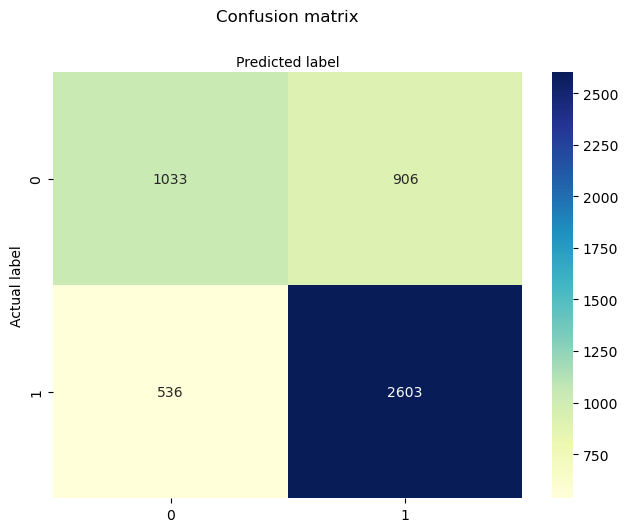

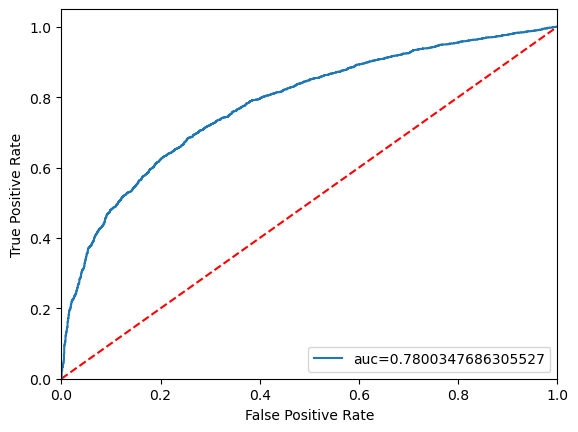

In [132]:
from sklearn.linear_model import LogisticRegressionCV
lr_CV = LogisticRegressionCV(cv=10, random_state=23).fit(X_train, y_train)
y_pred =lr_CV.predict(X_test)

acc,precision,recall,f1=model_performance(lr_CV,X_test,y_test, y_pred)
model_performance_df.loc[len(model_performance_df)] = ['Logistic Regression with CV',acc,precision,recall,f1]

In [133]:
model_performance_df

,Model,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,0.88972,0.909235,0.912711,0.910970
1,Logistic Regression with CV,0.71603,0.741807,0.829245,0.783093


##### 3. Bernoulli Naiv bayes

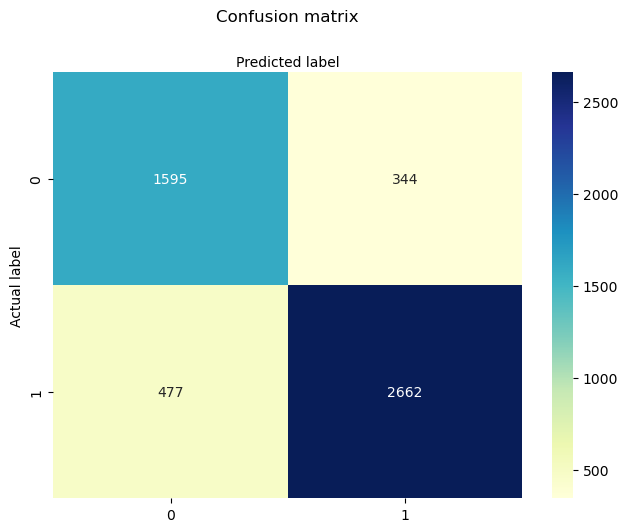

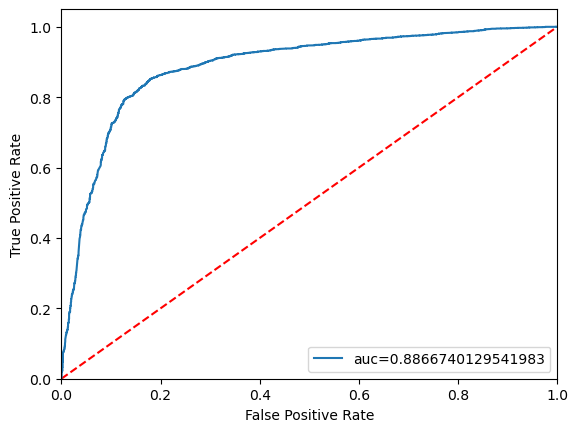

In [135]:
from sklearn.naive_bayes import BernoulliNB
B_NB = BernoulliNB(fit_prior=True, alpha=1).fit(X_train, y_train)

y_pred = B_NB.predict(X_test)

acc,precision,recall,f1=model_performance(B_NB,X_test,y_test, y_pred)
model_performance_df.loc[len(model_performance_df)] = ['BernoulliNB',acc,precision,recall,f1]

In [136]:
model_performance_df

,Model,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,0.889720,0.909235,0.912711,0.910970
1,Logistic Regression with CV,0.716030,0.741807,0.829245,0.783093
2,BernoulliNB,0.838322,0.885562,0.848041,0.866395


##### 4. Random Forest Model

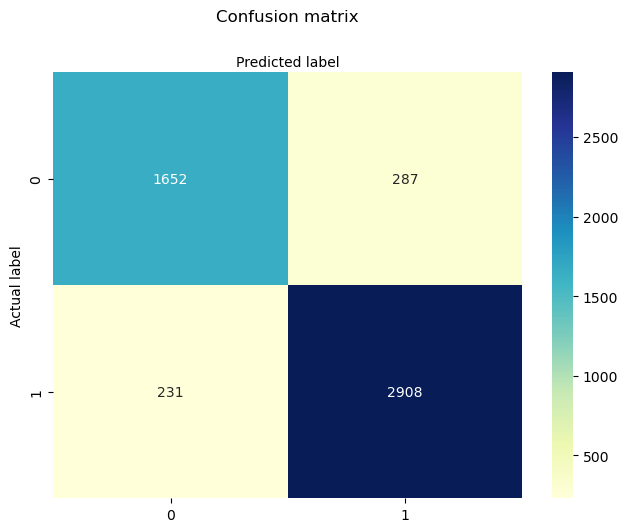

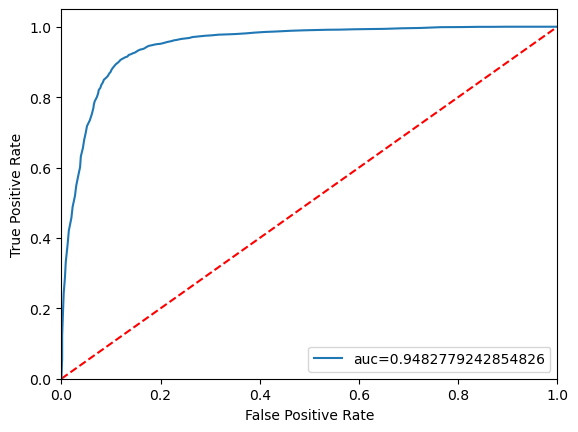

In [138]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)

y_pred = rf.predict(X_test)

acc,precision,recall,f1=model_performance(rf,X_test,y_test, y_pred)
model_performance_df.loc[len(model_performance_df)] = ['Random Foreset',acc,precision,recall,f1]

In [139]:
model_performance_df

,Model,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,0.889720,0.909235,0.912711,0.910970
1,Logistic Regression with CV,0.716030,0.741807,0.829245,0.783093
2,BernoulliNB,0.838322,0.885562,0.848041,0.866395
3,Random Foreset,0.897991,0.910172,0.926410,0.918219


##### 5. XG Boost

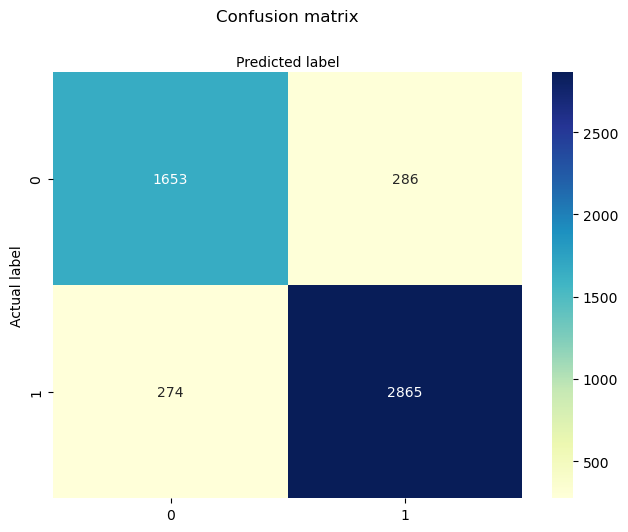

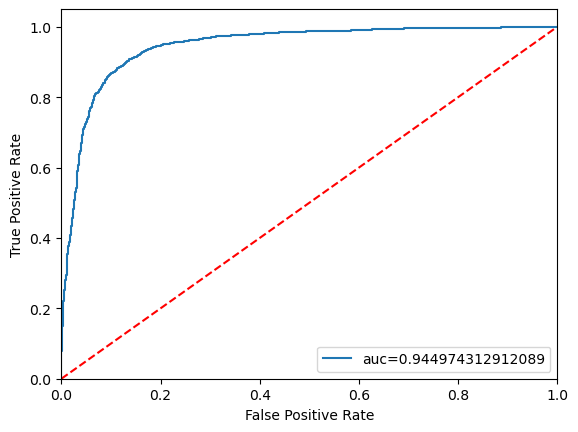

In [140]:
import xgboost as xgb
y_train_num = np.where(y_train=='Y',1,0)
#y_test_num = np.where(y_test=='Y',1,0) 
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  
    random_state=42
).fit(X_train, y_train_num)

y_pred_num = xgb_model.predict(X_test)
y_pred = np.where(y_pred_num==1,'Y','N')
acc,precision,recall,f1=model_performance(xgb_model,X_test,y_test, y_pred)
model_performance_df.loc[len(model_performance_df)] = ['Xgboost',acc,precision,recall,f1]

In [141]:
model_performance_df

,Model,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,0.889720,0.909235,0.912711,0.910970
1,Logistic Regression with CV,0.716030,0.741807,0.829245,0.783093
2,BernoulliNB,0.838322,0.885562,0.848041,0.866395
3,Random Foreset,0.897991,0.910172,0.926410,0.918219
4,Xgboost,0.889720,0.909235,0.912711,0.910970
